In [1]:
import glob
from nuscenes.nuscenes import NuScenes 
from matplotlib import pyplot as plt
from PIL import Image
from tqdm import tqdm

%load_ext autoreload
%autoreload 2
import sys 
import os
sys.path.insert(0, os.path.abspath('..'))
from scripts.make_nuscenes_labels import *
from src.utils.configs import get_default_configuration
from src.data.utils import get_visible_mask, get_occlusion_mask, transform, \
    encode_binary_labels
import src.data.nuscenes.utils as nusc_utils

## Visualize Processed Nuscenes 
Determine if the processed nuscenes data is correct and reasonable. 

In [2]:
# Main variables
folder_path = '/ocean/projects/cis220039p/cherieho/data/datasets/nuscenes/nuscenes_processed_camfrontmap_0706/map/boston-seaport/train'
# folder_path = '/ocean/projects/cis220039p/cherieho/data/datasets/nuscenes/nuscenes_full_intermprocessed_alllog_camfront_map_0706/map'

In [3]:
# Given a folder path, get list of all images using glob
def get_image_paths(folder_path):
    image_paths = glob.glob(folder_path + '/*.png')
    return image_paths
image_paths = get_image_paths(folder_path)
print(len(image_paths))

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
17299


 32%|███▏      | 8/25 [00:00<00:00, 25.68it/s]

1 : 24959f3f5c6b4ce6a2ed1c54d7f5e3e7.png
2 : f169bb8c4c5642179d5359f9ee6a167c.png
3 : acd3fdd3909a424c8dcdb324ac13a683.png
4 : 339ead96177c4e338fde8235c188cfaa.png
5 : f4ee0a7ec0544d699b6d77e910344a40.png
6 : 5f5ac842d0d74e9f9ef0a3afdac54f16.png
7 : 34346fc6dbc54931913847339b48abc2.png
8 : 87e69795526941e59281601511d2ef2c.png
9 : 6301ed8cdd1f4faea2e22f7d6648b66c.png
10 : 665e155d1c3c4abdb5129b35b80c3b1b.png
11 : bd84198b8c4e4aa6b4273ec8dd962c8e.png


 68%|██████▊   | 17/25 [00:00<00:00, 34.02it/s]

12 : c1484411d42c4c069003e547b7f22eb5.png
13 : f66ef8260b1a42928b449d46ea08fbf2.png
14 : 524379c410a542e9b7063bea4f94bbb7.png
15 : a0afc9ef14fe4cfcb38a85732ee05bec.png
16 : d98917f2928142179f01e65fb7670319.png
17 : d0fbd2a032384b55bf2b46b6ce62c6ee.png
18 : 91a55c090344454d86067eae9cf9ca4e.png
19 : c88a592b5a8146d6b5d772a1d7f60260.png
20 : a6d1faec5a7b48658e0285821c00c13c.png
21 : f4c4a1d61cd14f16b3e95c43aee83d5a.png


100%|██████████| 25/25 [00:00<00:00, 32.00it/s]


22 : 01d25353d8d244f7ba119789d6517085.png
23 : 8b4beea13fed4247a5a0da898e257c87.png
24 : 646e12da832a423c835bc7ee30c20c40.png
25 : 70d7938938e64345a7560e0d8c4cf7a1.png


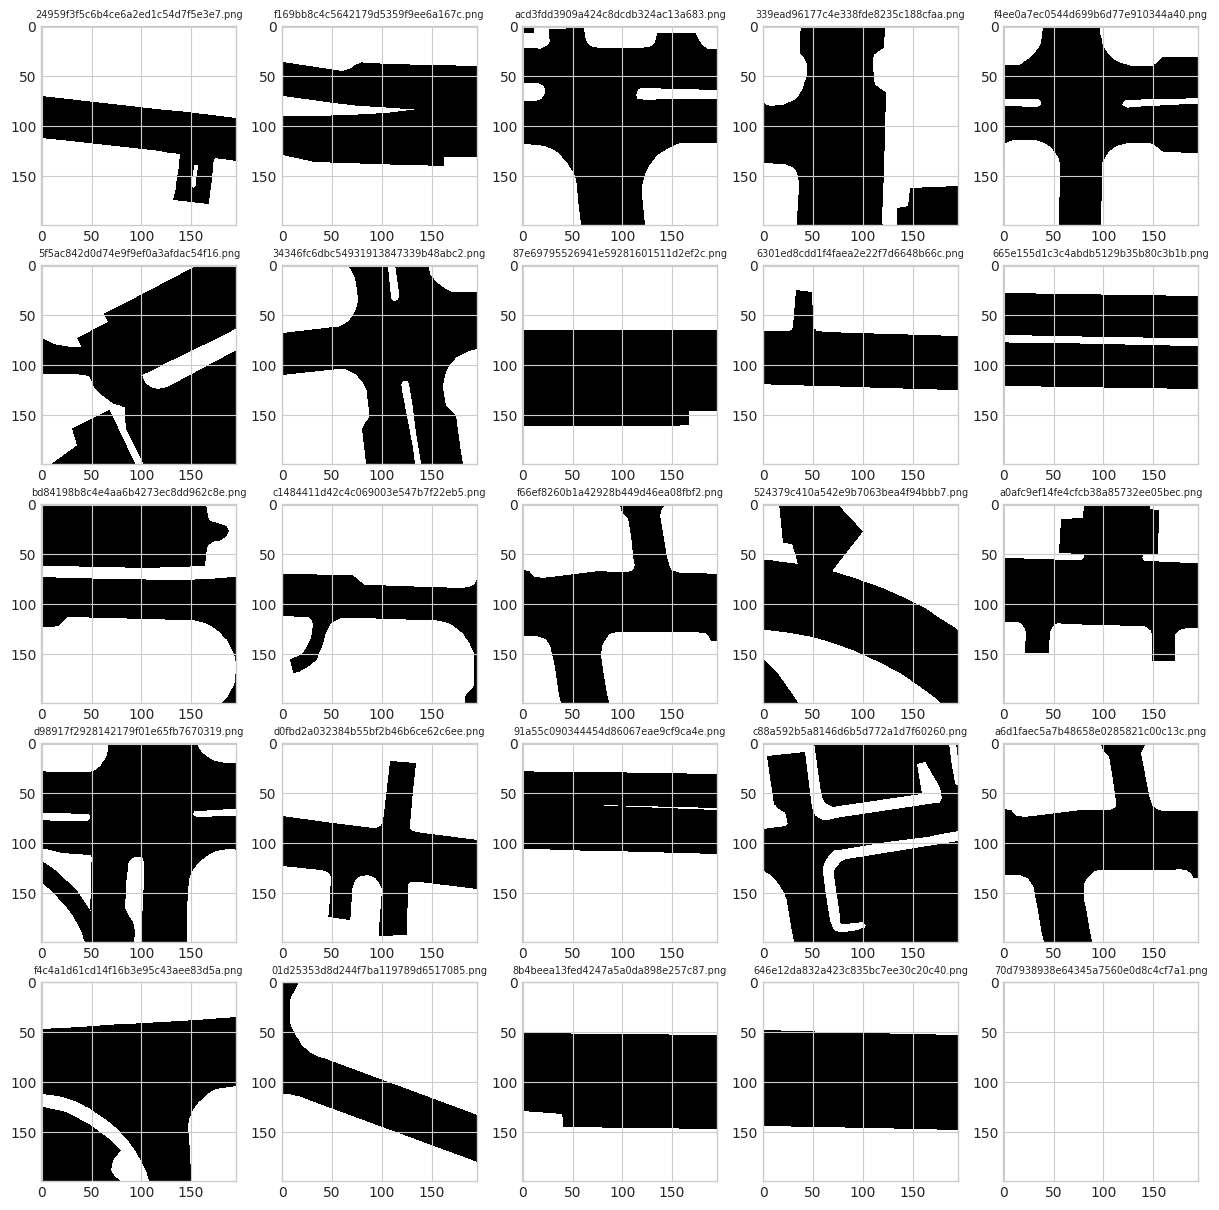

 28%|██▊       | 7/25 [00:00<00:00, 38.14it/s]

1 : 9c13f0beaceb486c8b735d76960533bb.png
2 : 94704bdb2ed44a55a499060a95d6e5ee.png
3 : 0ec9e60013444456bc29b1232c8c6477.png
4 : b1135c04a04a4caba3deae606bdb9440.png
5 : e7ce7b97daab450db91e10c583466832.png
6 : f703bc992d3442168969412e659b5768.png
7 : 2d9d4f9be1274b53a544b4b5cf0e7e42.png
8 : d1dde6274f424e09b54d09ee4c594c0b.png


 64%|██████▍   | 16/25 [00:00<00:00, 33.20it/s]

9 : 78002e4f3b27413291cd646444d17c32.png
10 : 6b50354c82fe43f082135a1f20f03789.png
11 : dfa06c7d23b54895b6f4ec15d4a3d59d.png
12 : e9836e5665b84bd594695c90dd0eff46.png
13 : 1b5b3c51ed21471a8940891917b0011e.png
14 : 18827f57c05c4b8a89fc72d5edc03733.png
15 : eafa57ac18574c29be1d2b01fb63e425.png
16 : c99a93e6a82d433ea89a5a2e85e509a8.png
17 : cbdce1b4216f499ab620c60b7741bcc2.png
18 : b67b4af69b6a46c3bfb1ba76450b0310.png


100%|██████████| 25/25 [00:00<00:00, 37.54it/s]


19 : aeb139f7f34d42a8871a1ba6688e4027.png
20 : 62e71190972a41f38994d4b021782f8c.png
21 : 5de3eaa72bae4c03bedc7d95e22450f2.png
22 : 14ed1850242f4128a491c09847e007b7.png
23 : 1068f0fbd6024d7496cf6c8df175de30.png
24 : 5e33f3e4a2b348c39bcac9a94f7a7a28.png
25 : 58c9088a179f49bbbe94240edee5741f.png


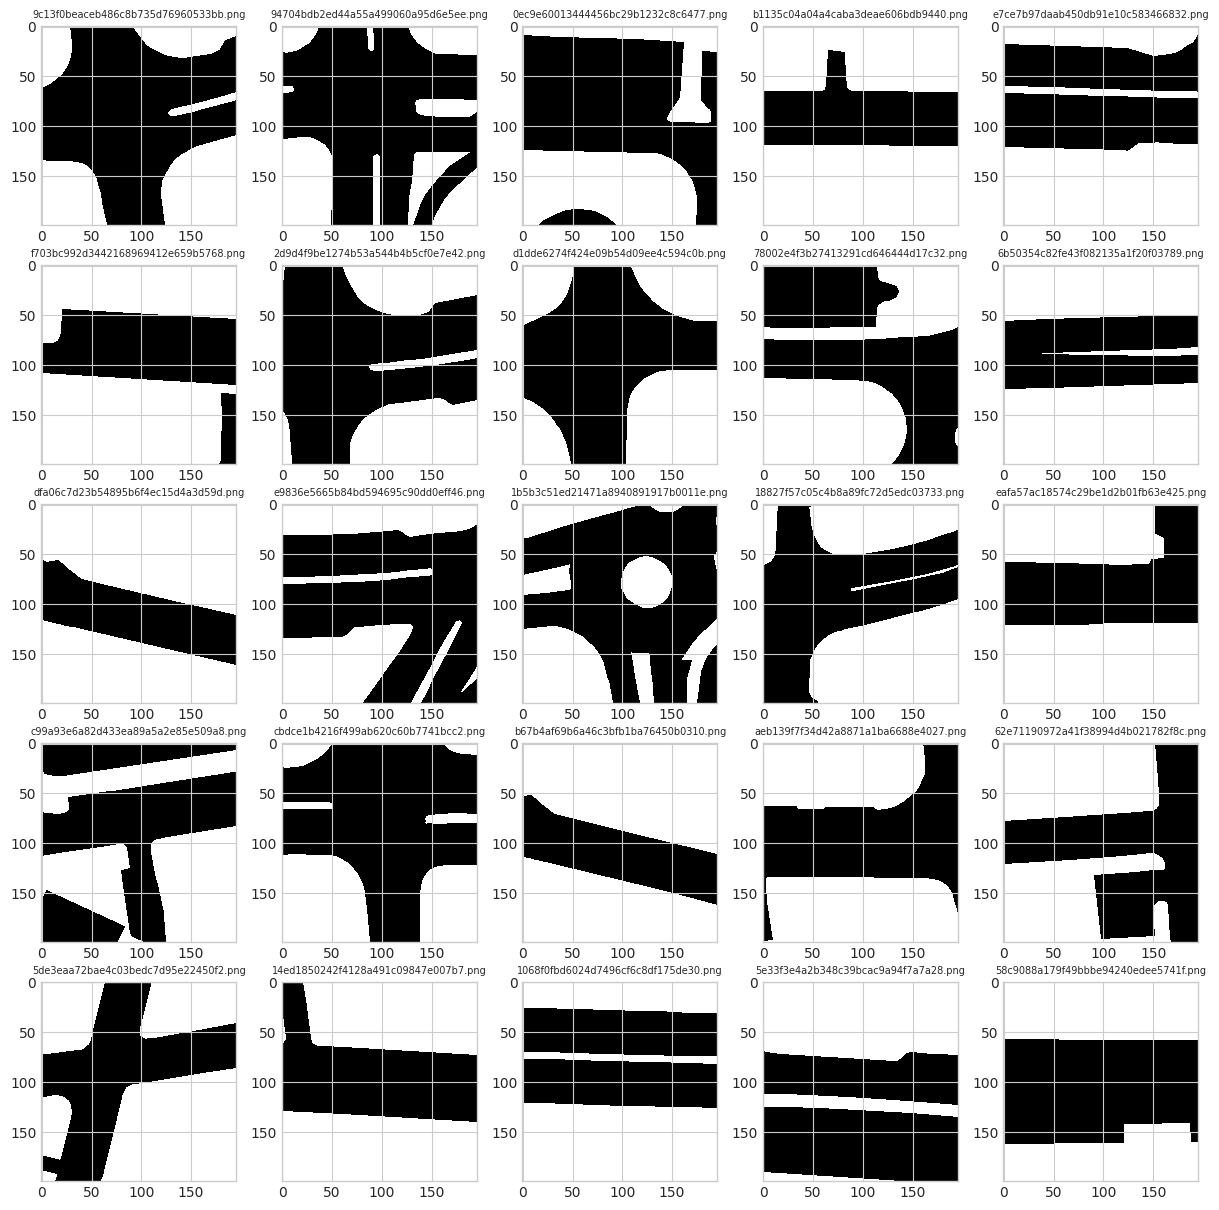

In [4]:
# Given a list of image paths, display them in a grid up to user-defined number of columns and rows
def display_images(image_paths, num_cols, num_rows):
    fig = plt.figure(figsize=(15, 15))
    for i in tqdm(range(1, num_cols*num_rows + 1)):
        img = Image.open(image_paths[i-1])
        fig.add_subplot(num_rows, num_cols, i)
        # the title of each image is the file name of the image path with font size based on what fits
        plt.title(image_paths[i-1].split('/')[-1], fontsize=7)
        print(i, ":", image_paths[i-1].split('/')[-1])
        plt.imshow(img)
    plt.show()
for j in range(2):
    display_images(image_paths[25*j:25*(j+1)], num_cols=5, num_rows=5)

## Visualize specific scene in Nuscenes object

In [75]:
## From make_nuscenes_label.py
# Load the default config
config = get_default_configuration()
config.merge_from_file('../configs/datasets/nuscenes.yml')

# generally trainval takes 1 minute to initialize
dataroot = '/ocean/projects/cis220039p/cherieho/data/datasets/nuscenes/nuscenes_full'
nuscenes = NuScenes(version='v1.0-trainval', dataroot=dataroot, verbose=True)

# Preload NuScenes map data
map_data = { location : load_map_data(dataroot, location) 
                for location in nusc_utils.LOCATIONS }

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 48.616 seconds.
Reverse indexing ...
Done reverse indexing in 8.4 seconds.


/ocean/projects/cis220039p/cherieho/data/hmap/mono-semantic-maps/scripts/make_nuscenes_labels.py:175: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  # Store as an R-Tree for fast intersection queries


: 

{'boston-seaport': OrderedDict([('drivable_area',
               <shapely.strtree.STRtree at 0x7f51f201a440>),
              ('ped_crossing', <shapely.strtree.STRtree at 0x7f51f201afb0>),
              ('walkway', <shapely.strtree.STRtree at 0x7f51f2019e40>),
              ('carpark_area', <shapely.strtree.STRtree at 0x7f51f2063910>),
              ('road_segment', <shapely.strtree.STRtree at 0x7f50ba932a40>),
              ('lane', <shapely.strtree.STRtree at 0x7f50ba946140>)]),
 'singapore-onenorth': OrderedDict([('drivable_area',
               <shapely.strtree.STRtree at 0x7f50ba7af850>),
              ('ped_crossing', <shapely.strtree.STRtree at 0x7f50ba7af7f0>),
              ('walkway', <shapely.strtree.STRtree at 0x7f50ba7af8e0>),
              ('carpark_area', <shapely.strtree.STRtree at 0x7f50bb78a890>),
              ('road_segment', <shapely.strtree.STRtree at 0x7f50b809a440>),
              ('lane', <shapely.strtree.STRtree at 0x7f50b809b310>)]),
 'singapore-queenstown': O

In [1]:
sample_token = 'f4ee0a7ec0544d699b6d77e910344a40'
map_data_in_location = map_data['boston-seaport']

# Find record based on sample_token
sample_record = nuscenes.get('sample', sample_token)

# Get the cam fron image filename
cam_front_data_sample = nuscenes.get('sample_data', sample_record['data']['CAM_FRONT'])
# Get nuscenes BEV map for given record
process_sample_data(nuscenes, map_data_in_location, cam_front_data_sample, None, config,show_viz=True)


The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


NameError: name 'map_data' is not defined